#CIS 545 Final Project: Bank Marketing





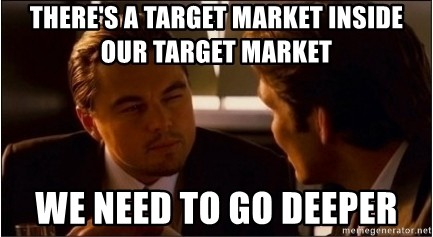

Hello! This is our final group project for this course. Our team consists of 3 members (Keshav Ramji, Christian Sun, and Kishen Sivabalan), and we've chosen to look at a marketing dataset sourced from UCI's Machine Learning Repository. Our dataset can be found [here on Kaggle](https://www.kaggle.com/janiobachmann/bank-marketing-dataset) as well as directly on [UCI's website](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). 

##Understanding the dataset
Our dataset consists of information collected by a Portugese Banking Institution in relation to one of their direct marketing campaigns. The ultimate goal is to predict whether clients will subscribe to a term deposit, given a large number of features on their clients, including but not limited to age, education, marital status, etc. There are 17 columns in total (including the target variable of "deposit") and there are slightly over 11.1 thousand entries in our datset. Next, we'll briefly desribe each of our given features before moving forward.



###Features

1. age : current age of the client (numerical)
2. job : the job of our client, broadly categorized to certain job types (categorical)
3. marital : client's marital status (categorical)
4. education : degree of education that the client has reeived (categorical)
5. default : whether the client currently has credit in default (categorical/boolean)
6. balance : client's current stored balance
7. housing : whether the client currently has a housing loan (categorical/boolean)
8. loan : whether the client currently has a personal loan (categorical/boolean)
9. contact : type of communication used to contact our client (categorical/boolean)
10. day : Last day that the client was contacted (together with the month column, we are able to produce the date) (categorical)
11. month : last month that the client was contacted (categorical)
12. duration : duration of the final moment of contact with the client (numerical)
13. campaign : number of calls performed during this campaign for this client (numerical)
14. pdays : number days that have passed by since a client was contacted from a previous campaign (-1 if has not been contacted before) (numerical)
15. previous : number of calls performed before this campaign for this client (numerical)
16. poutcome : outcome of a previous marketing campaign (if applicable) on our client (categorical)


###Target
17. deposit : whether the client finally agreed to subscribe to a term deposit (categorical/boolean)

##Project Description and Goals

The overarching goal of our project is use the given features to predict the outcome of the "deposit" column. In other words, given data on a specific client, are they likely to subscribe to the aformentioned term deposit? 

In accordance with this aim, we will carry out necessary measures, such as varying forms of Exploratory Data Analysis, in order to better understand our data as well as features which are likely to have a larger impact on the model itself. We will also carry out all necessary measures to clean, structure and format our data such that it is ready to be modeled on. 

Furthermore, in the coming sections, we faced certain obstacles which required the use of additional techniques learned through this course. For example, in response to a highly imbalanced column in our dataset, we chose to apply the technique of oversampling. We also used feature scaling. In addition to responding to these challenges, we have also chosen to take preemptive measures to further boost our model, such as through PCA (to account for multicollinearity) and through the use of varying classification models (and an appropriate validation set) in order to determine the best performing model to proceed.

Lastly, we decided to take on a secondary, but smaller supplemental task to also predict the "balance" variable from our dataset. We chose to do this in order to be able to create and apply both types of machine learning models (regression/classification) within our project. However, as stated, this second problem is supplementary in nature to our larger focus on classification with our dataset.

##Set Up and Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from tqdm.notebook import tqdm

In [ ]:
data = pd.read_csv('bank.csv')

In [ ]:
# Looking at the dataframe
data.head()

age         job  marital  education  ... pdays  previous poutcome deposit
0   59      admin.  married  secondary  ...    -1         0  unknown     yes
1   56      admin.  married  secondary  ...    -1         0  unknown     yes
2   41  technician  married  secondary  ...    -1         0  unknown     yes
3   55    services  married  secondary  ...    -1         0  unknown     yes
4   54      admin.  married   tertiary  ...    -1         0  unknown     yes

[5 rows x 17 columns]

In [ ]:
# Checking for any null values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
# Looking at statistics of numerical data
data.describe()

age       balance  ...         pdays      previous
count  11162.000000  11162.000000  ...  11162.000000  11162.000000
mean      41.231948   1528.538524  ...     51.330407      0.832557
std       11.913369   3225.413326  ...    108.758282      2.292007
min       18.000000  -6847.000000  ...     -1.000000      0.000000
25%       32.000000    122.000000  ...     -1.000000      0.000000
50%       39.000000    550.000000  ...     -1.000000      0.000000
75%       49.000000   1708.000000  ...     20.750000      1.000000
max       95.000000  81204.000000  ...    854.000000     58.000000

[8 rows x 7 columns]

## Exploratory Data Analysis (EDA)

In [ ]:
ncols = ['balance', 'age', 'pdays', 'campaign', 'previous', 'duration']
numerical_df = data[['balance', 'age', 'pdays', 'campaign', 'previous', 'duration', 'deposit']]
numerical_df

balance  age  pdays  campaign  previous  duration deposit
0         2343   59     -1         1         0      1042     yes
1           45   56     -1         1         0      1467     yes
2         1270   41     -1         1         0      1389     yes
3         2476   55     -1         1         0       579     yes
4          184   54     -1         2         0       673     yes
...        ...  ...    ...       ...       ...       ...     ...
11157        1   33     -1         1         0       257      no
11158      733   39     -1         4         0        83      no
11159       29   32     -1         2         0       156      no
11160        0   43    172         2         5         9      no
11161        0   34     -1         1         0       628      no

[11162 rows x 7 columns]

In [ ]:
categorical_df = data.drop(ncols, axis=1)
categorical_df

job  marital  education default  ... day month poutcome  deposit
0           admin.  married  secondary      no  ...   5   may  unknown      yes
1           admin.  married  secondary      no  ...   5   may  unknown      yes
2       technician  married  secondary      no  ...   5   may  unknown      yes
3         services  married  secondary      no  ...   5   may  unknown      yes
4           admin.  married   tertiary      no  ...   5   may  unknown      yes
...            ...      ...        ...     ...  ...  ..   ...      ...      ...
11157  blue-collar   single    primary      no  ...  20   apr  unknown       no
11158     services  married  secondary      no  ...  16   jun  unknown       no
11159   technician   single  secondary      no  ...  19   aug  unknown       no
11160   technician  married  secondary      no  ...   8   may  failure       no
11161   technician  married  secondary      no  ...   9   jul  unknown       no

[11162 rows x 11 columns]

### Visualizing Categorical Data
We visualized this categorical data by using Seaborn and bar plots. We made a few observations:

1) Some of the features are somewhat unbalanced--for example, there are far more people who are married than divorced or single.

2) The default feature was incredibly unbalanced.

3) The day feature seems randomly distributed across the entire month. Intuitively, it also seems like it would be too specific to actually provide any meaningful data.

4) The campaign was most active during the month of May.

5) poutcome seems useless because it is primarily comprised of unknown data.

In [ ]:
def plot_cat(s):
  count = categorical_df.groupby(s).count()[['deposit']]
  count = count.reset_index()
  plt.figure(figsize=(16,8))
  sns.barplot(x =s, y='deposit', data=count)
  plt.title('deposit vs ' + s)

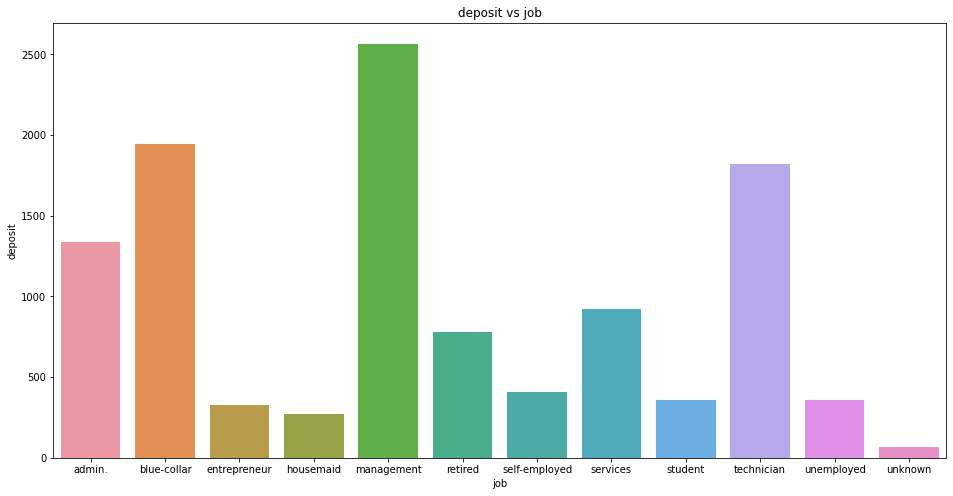

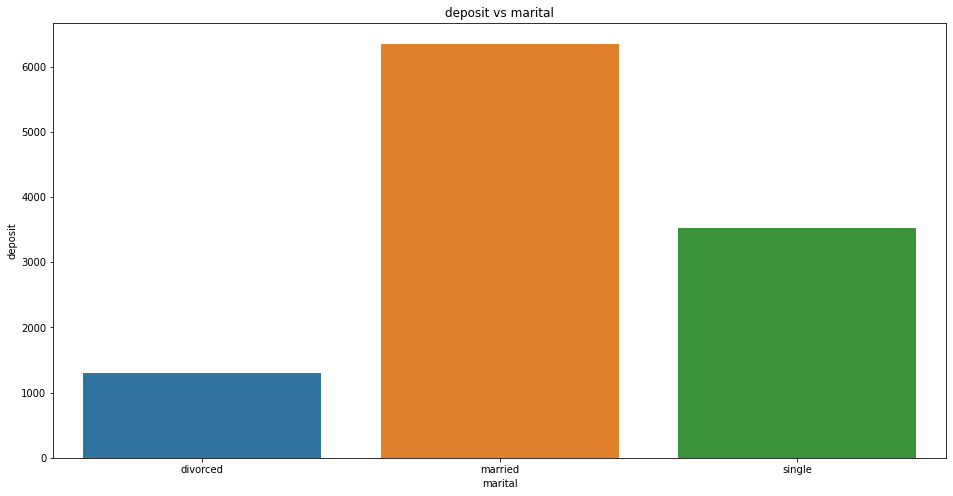

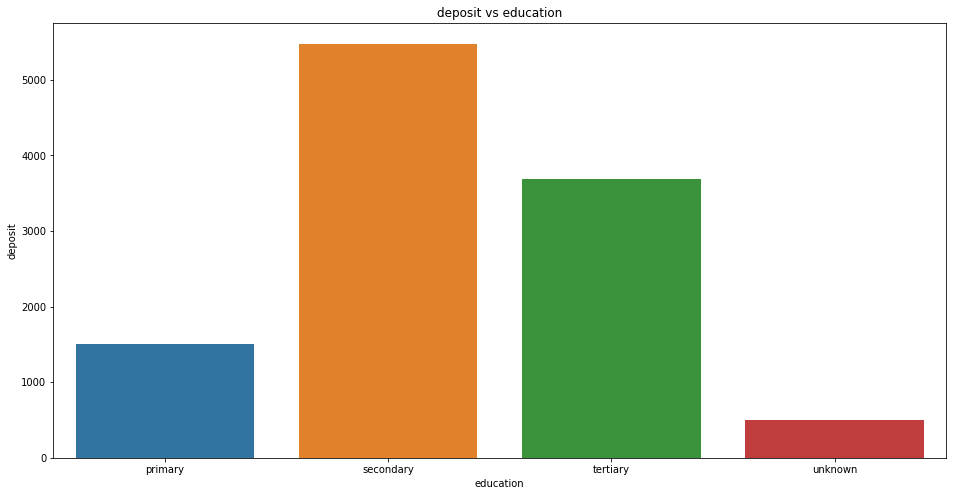

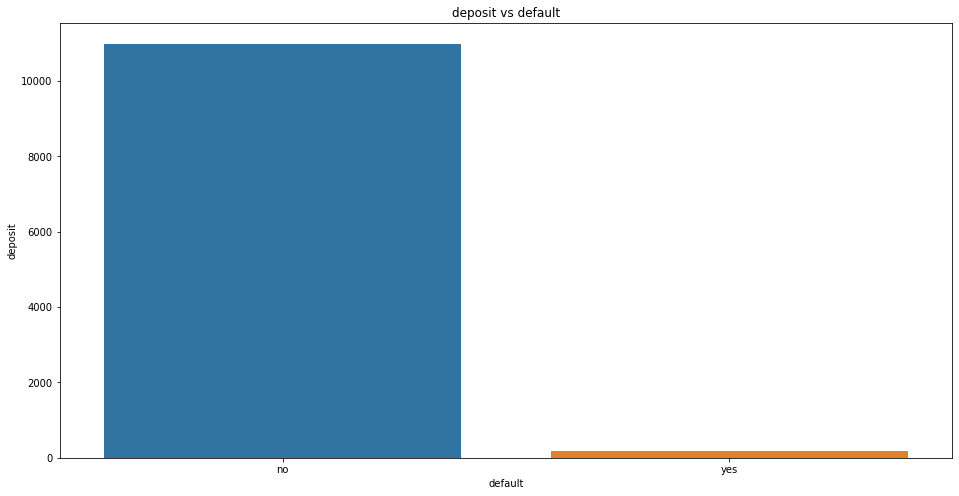

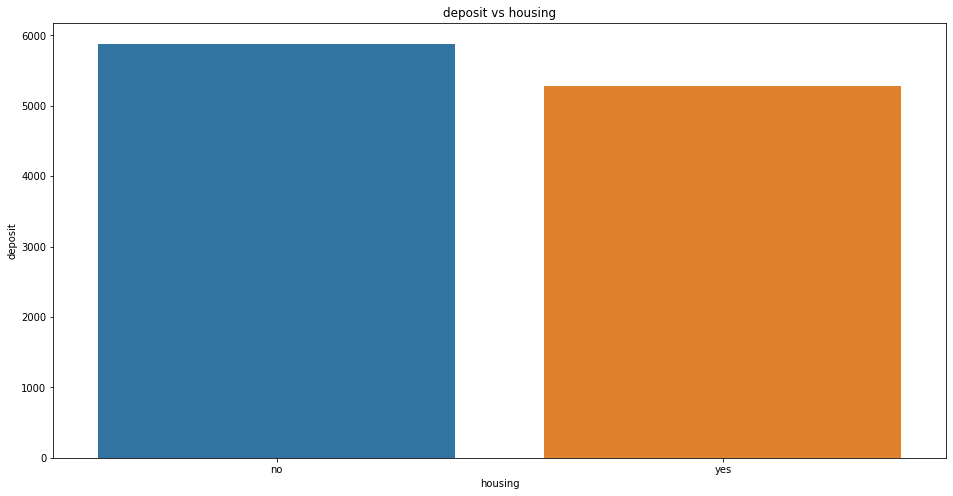

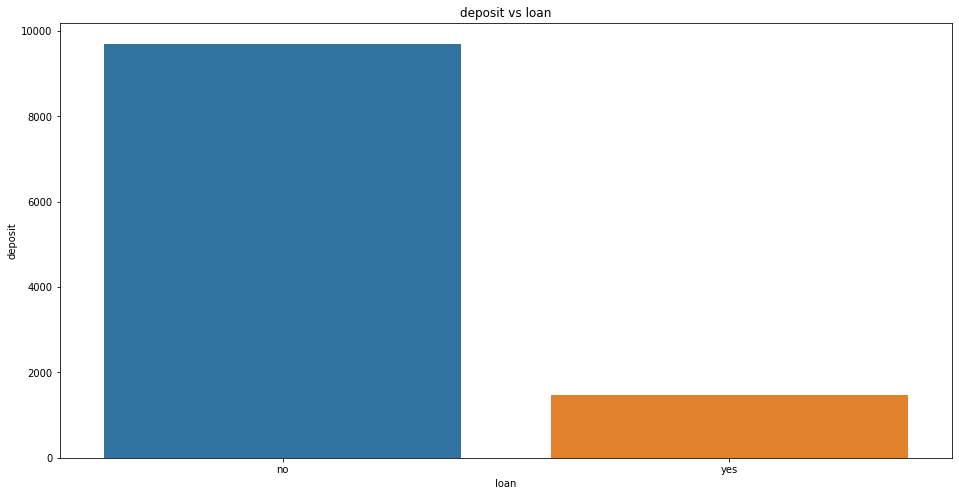

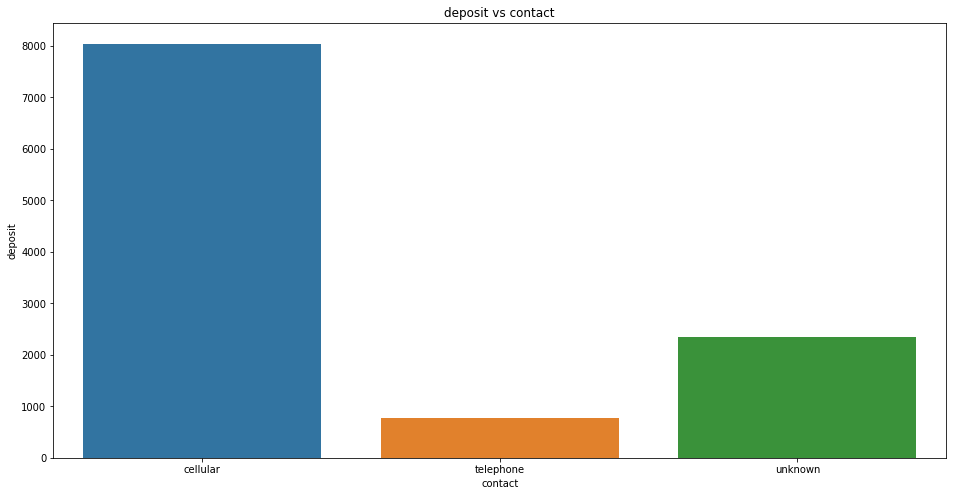

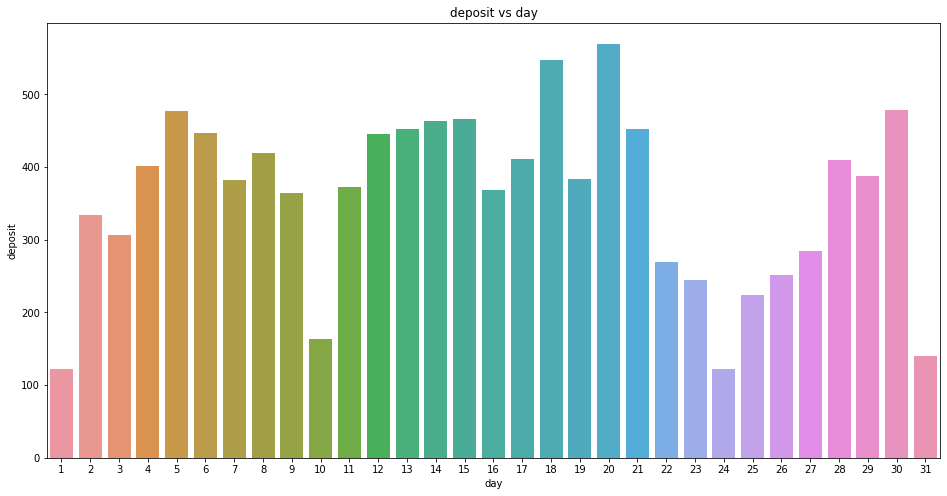

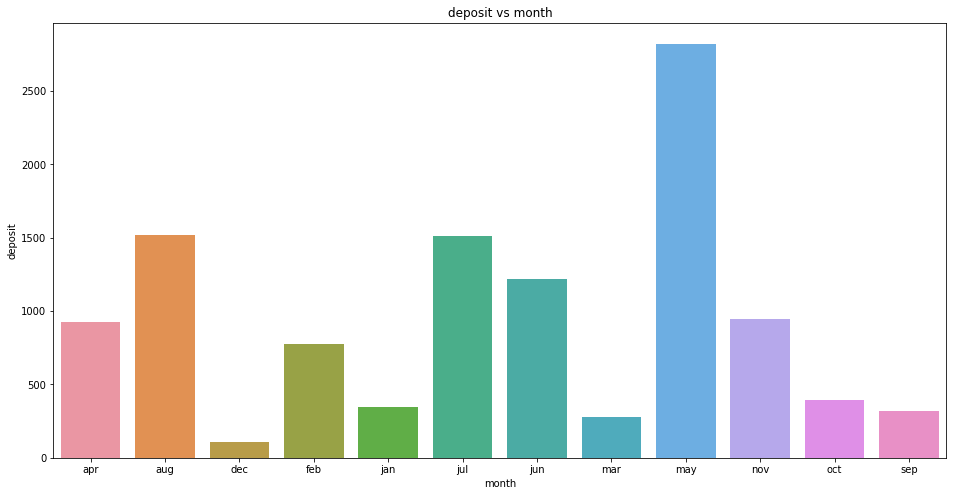

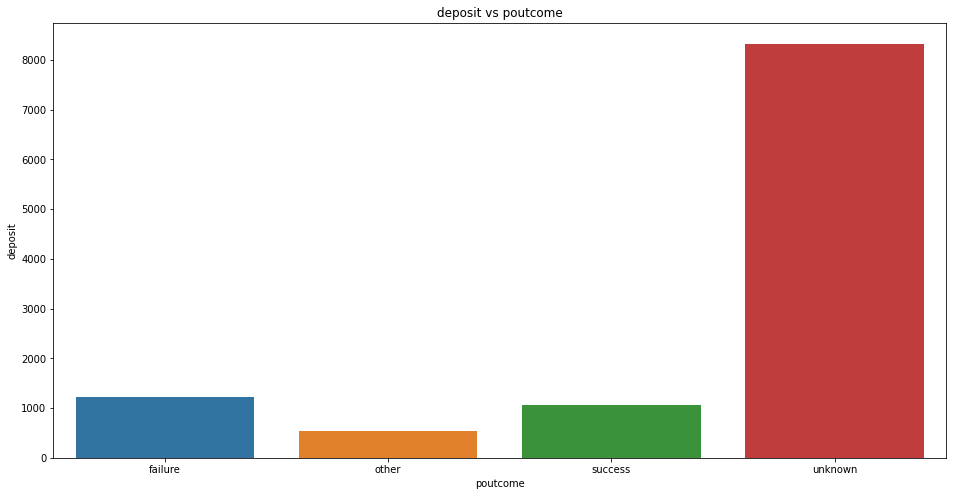

In [ ]:
for col in categorical_df.columns:
  if col != 'deposit':
    plot_cat(col)

### Deposit is Balanced
We wanted to check if our target variable, "deposit" was balanced. Luckily, it is relatively well-balanced (only a 300 count discrepancy between yes and no), so we don't need to do any oversampling or anything.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


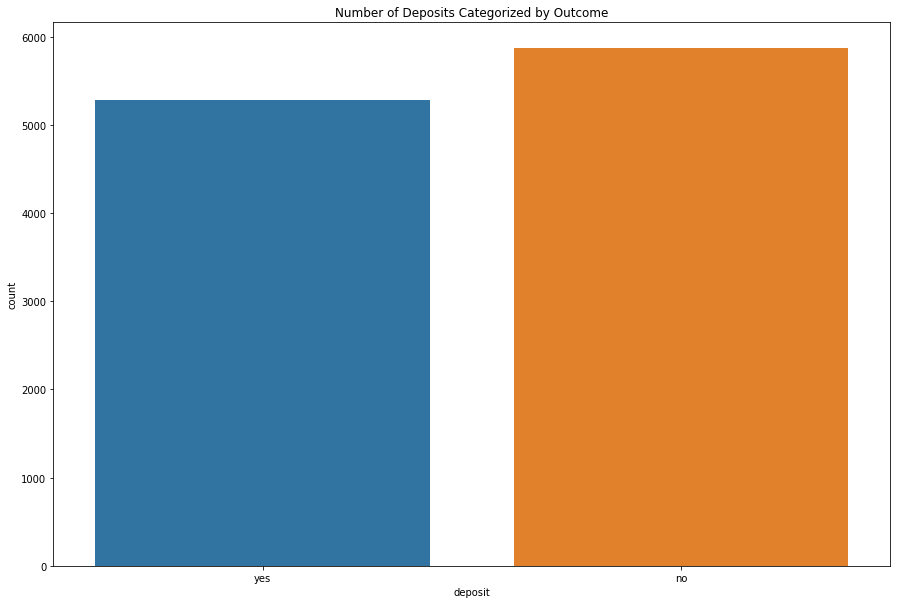

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(data['deposit'])
plt.title("Number of Deposits Categorized by Outcome")
plt.show()

### Heatmap Observations
We created a heatmap of the various numerical features within our dataset to see if any multicollinearity existed. We observed that the "pdays" and "previous" features appeared to be correlated, which suggests that we should drop one of them. All other features seemed to be uncorrelated, which was good news.

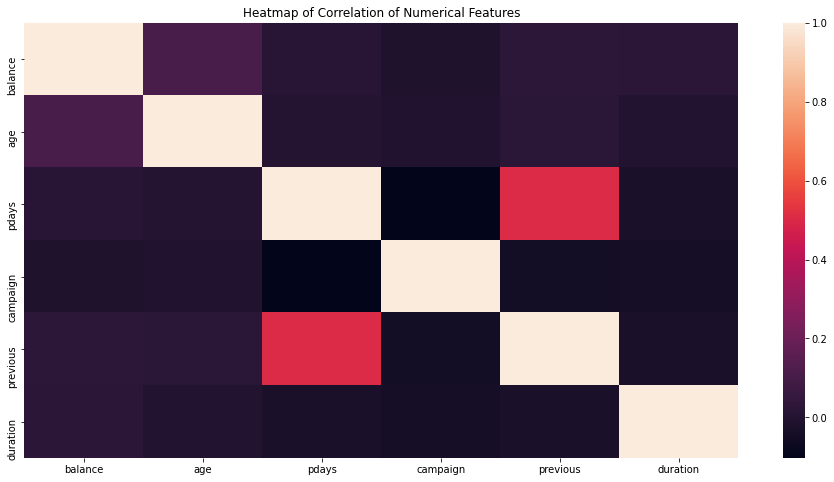

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Heatmap of Correlation of Numerical Features")
sns.heatmap(pd.DataFrame.corr(numerical_df))

### Pairplots
We created pairplots/scatterplots to identify any potential correlations between pairs of features and if they were related to whether or not people made deposits.

1) The younger and poorer that people are, the less likely they are to make a deposit. 

2) There appears to be a pretty strong correlation between duration of the call and whether or not people make a deposit.

<Figure size 1440x720 with 0 Axes>

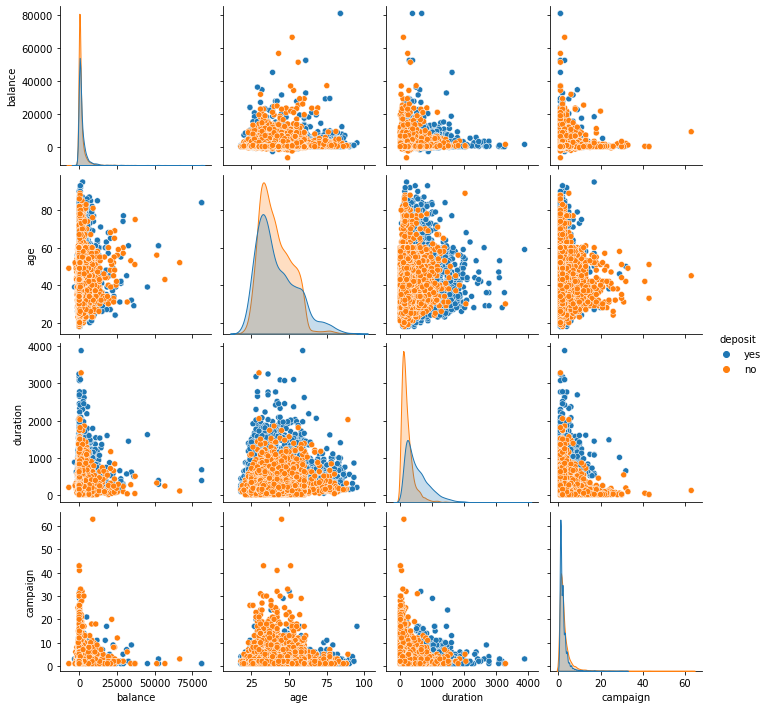

In [ ]:
plt.figure(figsize=(20,10))
sns.pairplot(numerical_df[['balance', 'age', 'duration', 'campaign', 'deposit']], hue='deposit')
plt.show()

### Visualizing Categorical Data
We used bar graphs to chart what percentage of each category of each categorical feature actually made a deposit.

1) Job seems to have a lot to do with whether or not someone makes a deposit. For example, students usually make deposits with over 0.7 probability.

2) Education doesn't seem to have too large of an effect on whether or not people make deposits.

3) Default, housing, and loan all seem to have approximately the same success rate. This forces us to consider whether or not these features are correlated somehow.

4) The success rate by day seems relatively random and distributed (with some spikes, but this is to be expected in a random distribution).

5) When the previous outcome is a success, a success occurs again with very high probability. Reversely, it is pretty much a coin flip when the previous 

In [ ]:
def plot_success(x):
  if x == 'deposit' or x == 'poutcome':
    return
  a = categorical_df[categorical_df['deposit'] == 'yes'].groupby(x).count().reset_index()[[x, 'deposit']]
  a['total'] = categorical_df.groupby(x).count().reset_index()['deposit']
  a['success_rate'] = a['deposit'] / a['total']
  plt.figure(figsize=(16,8))
  plt.title("Success Rate Based On " + x.capitalize())
  sns.barplot(x =x, y='success_rate', data=a)

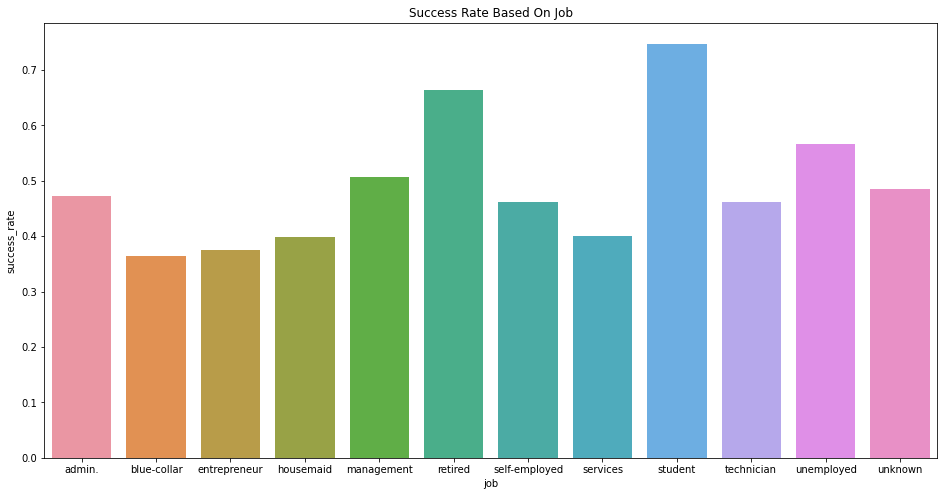

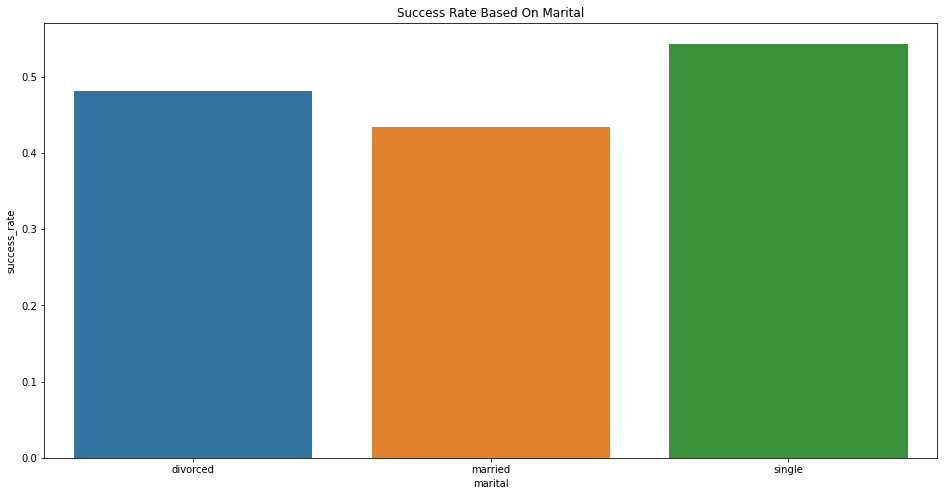

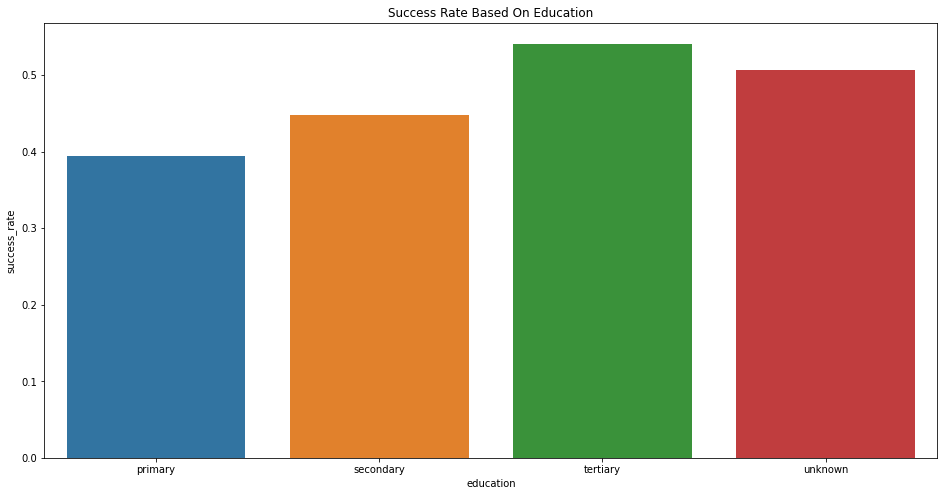

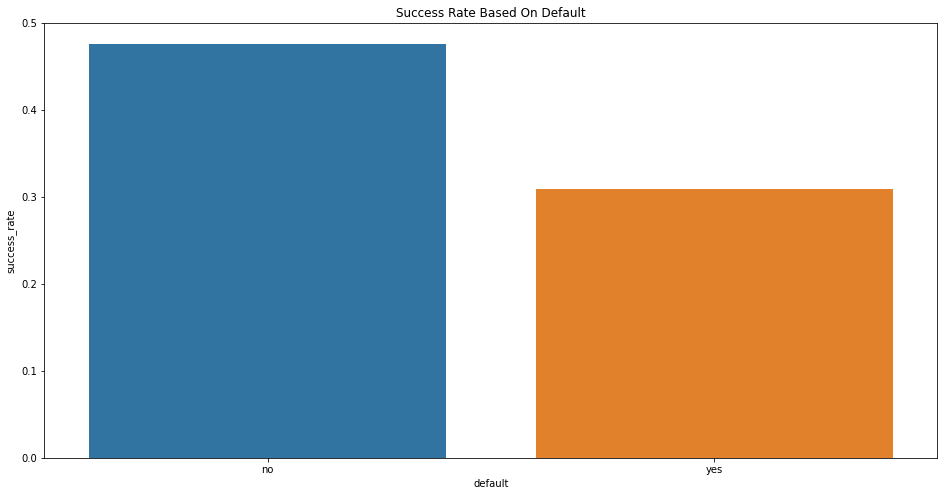

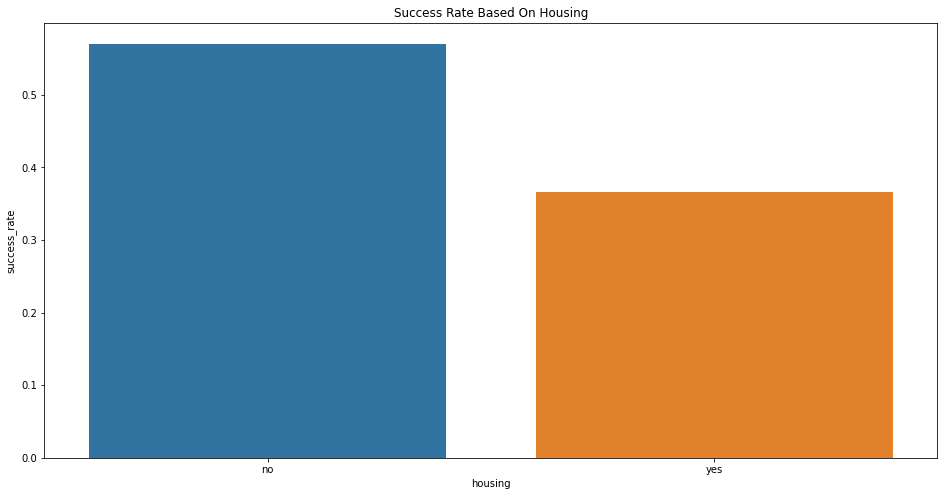

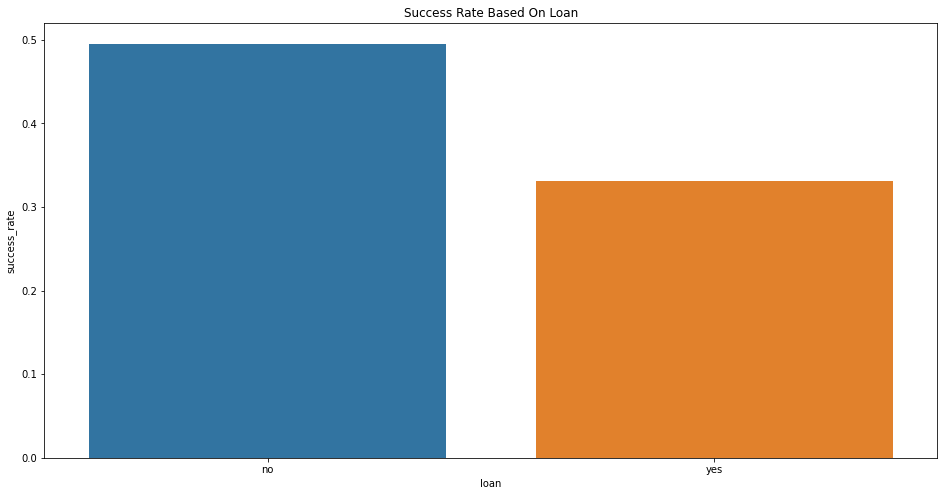

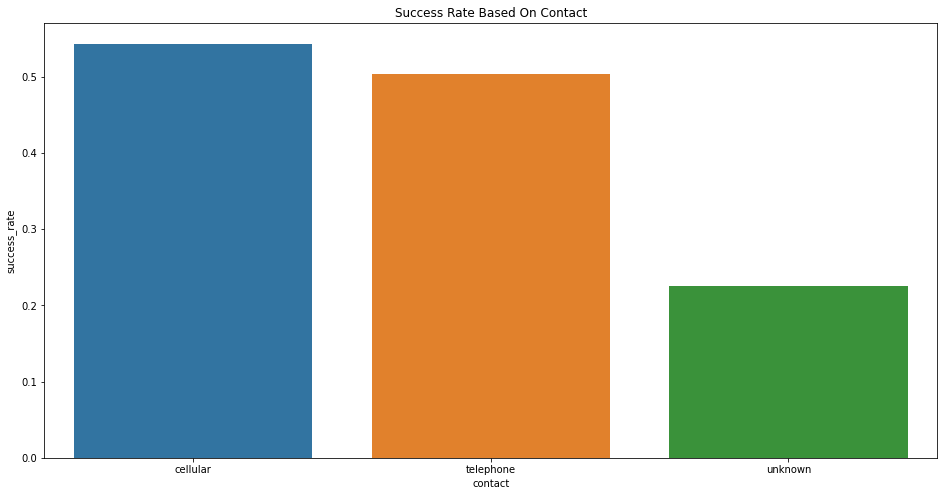

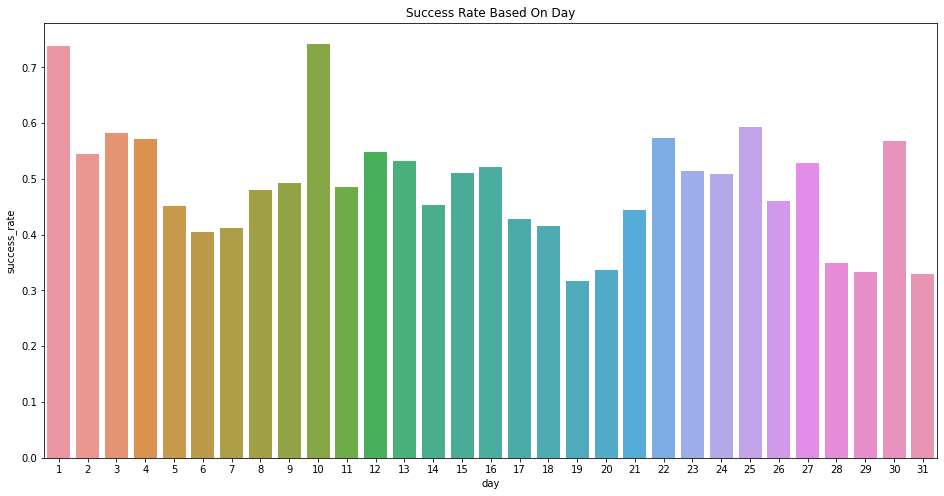

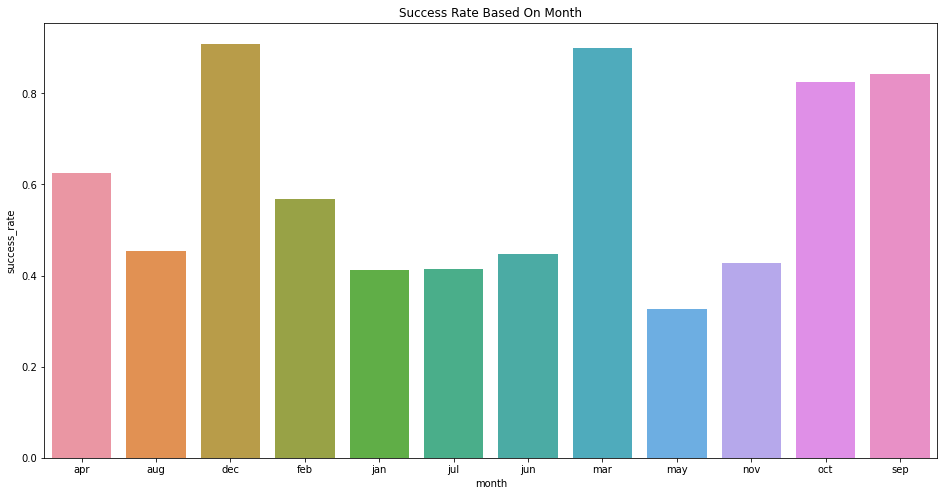

In [ ]:
for col in categorical_df.columns:
  plot_success(col)

## Feature Engineering and Data Manipulation

### Dropping "pdays" and "poutcome"
We chose to drop "pdays" and "poutcome." "poutcome" had 8326/11162 entries marked as "unknown," so it made sense to drop it as it didn't even apply to most of our entries. "pdays" had 8324/11162 entries marked as "-1," which is the equivalent of "unknown," so we decided to drop that too.

In [ ]:
data = data.drop(['pdays', 'poutcome'], axis=1)

### Converting Binary Features into 0 and 1
Because machine learning models can't accept non-integer/float values as inputs, we converted our binary yes/no features into integer columns where 0 represents no and 1 represents yes.

In [ ]:
data['default'] = data['default'].apply(lambda x: 0 if x == 'no' else 1)
data['housing'] = data['housing'].apply(lambda x: 0 if x == 'no' else 1)
data['loan'] = data['loan'].apply(lambda x: 0 if x == 'no' else 1)
data['deposit'] = data['deposit'].apply(lambda x: 0 if x == 'no' else 1)
data.head()

age         job  marital  education  ...  duration  campaign  previous  deposit
0   59      admin.  married  secondary  ...      1042         1         0        1
1   56      admin.  married  secondary  ...      1467         1         0        1
2   41  technician  married  secondary  ...      1389         1         0        1
3   55    services  married  secondary  ...       579         1         0        1
4   54      admin.  married   tertiary  ...       673         2         0        1

[5 rows x 15 columns]

In [ ]:
categorical_set = ['job', 'marital', 'education', 'contact', 'month']

In [ ]:
for cols in categorical_set:
  data = pd.concat([data, pd.get_dummies(data[cols], prefix=cols)], axis = 1)

In [ ]:
data = data.drop(categorical_set, axis=1)

In [ ]:
data.head()

age  default  balance  housing  ...  month_may  month_nov  month_oct  month_sep
0   59        0     2343        1  ...          1          0          0          0
1   56        0       45        0  ...          1          0          0          0
2   41        0     1270        1  ...          1          0          0          0
3   55        0     2476        1  ...          1          0          0          0
4   54        0      184        0  ...          1          0          0          0

[5 rows x 44 columns]

### Standard Scaling Numerical Data
Our numerical data took on a large range of values, so as best practice, we scaled each numerical feature to the range of [-1, 1]. We avoided standard scaling "balance" here because we wanted to first run a regression model to see if predicting balance was possible. We first dropped "deposit" and "balance" because these are our target variables for our classification (primary objective) and regression (supplementary objective) tasks respectively.

In [ ]:
numerical_df = numerical_df.drop(['deposit', 'balance'], axis=1)

In [ ]:
ss = StandardScaler()
ss.fit(X=numerical_df)
scaled_numerical = pd.DataFrame(ss.transform(numerical_df))

In [ ]:
data = pd.concat([data, scaled_numerical], axis=1)

In [ ]:
data = data.drop(['age', 'campaign', 'previous', 'duration', 'day'], axis=1)

## Creating and Applying Machine Learning Models

### Creating Training, Testing, and Validation Data
We wanted to try a little bit extra with the dataset, so we tried to fit and run regression models to predict the "balance" feature. We created training, testing, and validation data to facilitate this.

In [ ]:
y = data['balance']
x = data.drop('balance', axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123456789)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=123456789)

### Applying PCA to Reduce Multicollinearity
We wanted to avoid any multicollinearity that could potentially affect the performance of our model, so we applied Principal Component Analysis onto our data in order to try and combat this. After observing the graph, we noticed that it began to "level-off" around 30 components. Having 30 components seemed to capture around 95% of the data, so we took only 30 components and applied PCA to our training, validation, and testing data.

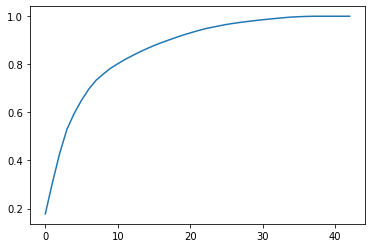

In [ ]:
pca = PCA()
pca.fit(x_train)
pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(pc_vs_variance)

In [ ]:
pca = PCA(n_components = 30)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)
x_val = pca.transform(x_val)

### Linear Regression Model on Balance
We wanted to try and train a linear regression model to see if we could predict the balance variable.

In [ ]:
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print("Lasso RMSE: " + str(np.sqrt(mean_squared_error(y_pred, y_test))))

Lasso RMSE: 3186.601526768945


In [ ]:
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
print("Ridge RMSE: " + str(np.sqrt(mean_squared_error(y_pred, y_test))))

Ridge RMSE: 3186.8868350191883


In [ ]:
enet = ElasticNet()
enet.fit(x_train, y_train)
y_pred = enet.predict(x_test)
print("Elastic Net RMSE: " + str(np.sqrt(mean_squared_error(y_pred, y_test))))

Elastic Net RMSE: 3208.7991062644683


In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

### A Poorly Fitting Regression Model
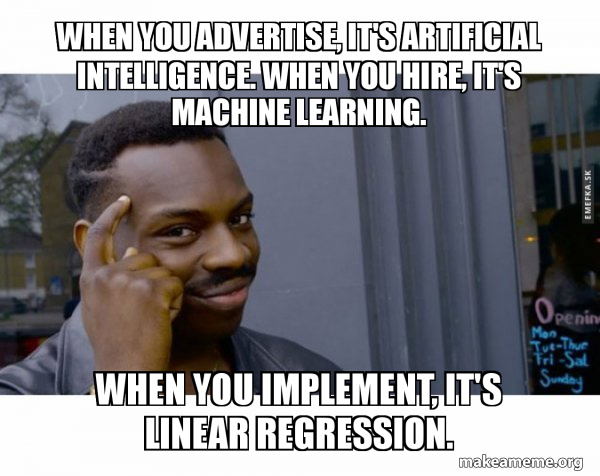

We ran a linear regression model on the data to try and predict the balance, but it ended up giving us a very poor RMSE value. This could be due to a variety of reasons, but we suspect it is likely because the dataset was not meant to be used for this purpose. For example, balance is poorly distributed across a large range of values, which makes it difficult for us to train an accurate model on it. However, it is possible that our model requires improvement. We tried applying various regularization techniques such as L1, L2, and Elastic Net, but none of them seemed to result in a significant improvement in RMSE. Therefore, we decided to stick to classifying whether or not people made a deposit, as this was the primary purpose of the dataset.

In [ ]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Linear Regression RMSE: " + str(np.sqrt(mean_squared_error(y_pred, y_test))))

Linear Regression RMSE: 3186.9022280050144


### Standard Scaling Balance
Before, we avoided standard scaling balance because it was our target variable. However, now that it is just going to be used as another feature, it makes sense (and is best practice) to standard scale it to the range of [-1, 1] in order to avoid adversely affecting the performance of our machine learning models.

In [ ]:
ss = StandardScaler()
data['balance'] = ss.fit_transform(data[['balance']])

In [ ]:
original_data = data.copy(deep = True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['deposit'], axis=1), data['deposit'], test_size = 0.2, random_state=123456789)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123456789)

### Running PCA... again
We once again applied PCA to our training data in order to identify any potential multicollinearity that still exists. We noticed that the graph levels off around 36 components, so we decided to apply PCA to our training, validation, and testing data with 36 components.

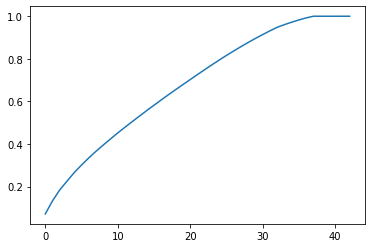

In [ ]:
pca = PCA()
pca.fit(StandardScaler().fit_transform(X_train))
pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(pc_vs_variance)

In [ ]:
pca = PCA(n_components = 36)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
X_val = pca.transform(X_val)

### Logistic Regression
The first classification model we attempted was a basic logistic regression. After experimenting with the hyperparameters, we chose to use elastic net regularization because our model benefited both from L1 and L2 regularization. L2 accounts for additional multicollinearity that may still exist and L1 accounts for less impactful features in the model. However, this required us to use the "saga" solver, as sklearn's other solvers don't actually support elastic net. We trained it over 1000 iterations because it sometimes threw errors when we trained it for less than that that the model wasn't converging.

In [ ]:
lr = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000, l1_ratio=0.4).fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy of Model: " + str(100*accuracy_score(y_test, y_pred)) + "%")

Accuracy of Model: 81.50470219435736%


### Random Forest Classifier
Next, we decided to try a random forest model. We used Grid Search to find the optimal hyperparameters and improve the accuracy of our model. It told us that the optimal max depth was 50 and number of estimators was 180. After using this on our classifier, it gave us an accuracy of approximately 82%, which is pretty satisfactory.

In [ ]:
rf = RandomForestClassifier(random_state=123456789)
params = {
  'max_depth': [50, 60, 70],
  'n_estimators': [180, 200, 220]
}

GS_object = GridSearchCV(estimator = rf, param_grid = params, verbose=2)
GS_object.fit(X_train, y_train)
GS_object.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=50, n_estimators=180 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... max_depth=50, n_estimators=180, total=   6.0s
[CV] max_depth=50, n_estimators=180 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV] ................... max_depth=50, n_estimators=180, total=   6.0s
[CV] max_depth=50, n_estimators=180 ..................................
[CV] ................... max_depth=50, n_estimators=180, total=   6.0s
[CV] max_depth=50, n_estimators=180 ..................................
[CV] ................... max_depth=50, n_estimators=180, total=   5.9s
[CV] max_depth=50, n_estimators=180 ..................................
[CV] ................... max_depth=50, n_estimators=180, total=   5.9s
[CV] max_depth=50, n_estimators=200 ..................................
[CV] ................... max_depth=50, n_estimators=200, total=   6.5s
[CV] max_depth=50, n_estimators=200 ..................................
[CV] ................... max_depth=50, n_estimators=200, total=   6.5s
[CV] max_depth=50, n_estimators=200 ..................................
[CV] ................... max_depth=50, n_estimators=200, total=   6.6s
[CV] max_depth=50, n_estimators=200 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  4.9min finished


{'max_depth': 50, 'n_estimators': 220}

In [ ]:
rf = RandomForestClassifier(n_estimators=180, max_depth=50)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy of Model: " + str(100*accuracy_score(y_test, y_pred)) + "%")

Accuracy of Model: 82.89296909986565%


### Gradient Boosted Classifier
Because Random Forest is an ensemble method, we hypothesized that XGBoost, another ensemble method using boosting instead, would also work well (hopefully better). Seeking a higher accuracy, we tried XGBoost but it still achieved approximately similar accuracies (80%) in comparison to Random Forest. 

In [ ]:
xg = XGBClassifier(n_estimators=1000, learning_rate=0.005, max_depth=100, random_state=42)
xg.fit(X_train, y_train,
        early_stopping_rounds=20,
        eval_set=[(X_val, y_val)],
        verbose=False)
y_pred = xg.predict(X_test)
print("Accuracy of Model: " + str(100*accuracy_score(y_test, y_pred)) + "%")

Accuracy of Model: 80.0268696820421%


### Multi-layer Perceptron in Scikit-Learn

We also tried the Multi-layer Perceptron Classifier on scikit-learn, which is the most applicable neural network classification model available in this framework without using PyTorch or TensorFlow. It would be interesting to see how it performs compared to the other models, and we find that although similar, it marginally outperforms the other classification models with an 83% accuracy. 

In [ ]:
mlp = MLPClassifier(random_state = 42, solver = 'sgd', shuffle = True, momentum = 0.99)
mlp.fit(X_train, y_train)
mlp.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8374384236453202

## Experimenting with Oversampling

Since the 'deposit' feature is largely balanced, oversampling would likely not improve our performance. Thus, we examine the 'default' feature, which is largely imbalanced - 98% of people did not default on their loans, and only 2% did. We explore the use of oversampling to counter this, and we use 2 major oversampling techniques - RandomOverSampler and SMOTE. 
 

While Random Oversampling is somewhat self-explanatory (random duplication of the minority class in an attempt to balance the dataset), SMOTE stands for Synthetic Minority Oversampling Technique. This involves the selection of the minority class and finding the k-nearest neighbors to the instance and using that for duplication in oversampling. This technique has also been shown to be effective in oversampling, so it was tried here as an alternative for comparison. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(original_data.drop(['default'], axis=1), original_data['default'], test_size = 0.2, random_state=42)
pca = PCA(n_components = 36)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Creating the oversamplers and applying them to the training datasets
from imblearn.over_sampling import SMOTE, RandomOverSampler, BorderlineSMOTE
smote_oversampler = SMOTE(k_neighbors = 1, sampling_strategy = 'auto', random_state = 42) # We can tune this k_neighbors parameter and see how it impacts accuracy of our models
smote_X_train, smote_Y_train = smote_oversampler.fit_sample(X_train, y_train)
r_oversampler = RandomOverSampler(sampling_strategy = 'auto', random_state = 42)
r_X_train, r_Y_train = r_oversampler.fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

### Running the Models with Oversampled Data

#### Logistic Regression

In [ ]:
# Running Logistic Regression with the Randomly Oversampled Training Dataset
lr = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000, l1_ratio=0.4).fit(r_X_train, r_Y_train)
y_pred = lr.predict(X_test)
print(str(100*accuracy_score(y_test, y_pred)) + "%")

72.9511867442902%


In [ ]:
# Running Logistic Regression with the SMOTE Oversampled Training Dataset
lr = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000, l1_ratio=0.4).fit(smote_X_train, smote_Y_train)
y_pred = lr.predict(X_test)
print(str(100*accuracy_score(y_test, y_pred)) + "%")

74.8320644872369%


#### Random Forest

In [ ]:
# Running Random Forest with the Randomly Oversampled Training Dataset
rf = RandomForestClassifier(n_estimators=180, max_depth=70)
rf.fit(r_X_train, r_Y_train)
y_pred = rf.predict(X_test)
print(str(100*accuracy_score(y_test, y_pred)) + "%")

98.20868786386028%


In [ ]:
# Running Random Forest Algorithm with the SMOTE Oversampled Training Dataset
rf = RandomForestClassifier(n_estimators=180, max_depth=70)
rf.fit(smote_X_train, smote_Y_train)
y_pred = rf.predict(X_test)
print(str(100*accuracy_score(y_test, y_pred)) + "%")

98.0295566502463%


#### XGBoost - Gradient Boosting 

In [ ]:
# Running XGBoost Classifier with the Randomly Oversampled Training Dataset
xg = XGBClassifier(n_estimators=1000, learning_rate=0.005, max_depth=100, random_state=42)
xg.fit(r_X_train, r_Y_train,
        early_stopping_rounds=20,
        eval_set=[(X_val, y_val)],
        verbose=False)
y_pred = xg.predict(X_test)
print(str(100*accuracy_score(y_test, y_pred)) + "%")

95.20824003582624%


In [ ]:
# Running XGBoost Classifier with the SMOTE Oversampled Training Dataset
xg = XGBClassifier(n_estimators=1000, learning_rate=0.005, max_depth=100, random_state=42)
xg.fit(smote_X_train, smote_Y_train,
        early_stopping_rounds=20,
        eval_set=[(X_val, y_val)],
        verbose=False)
y_pred = xg.predict(X_test)
print(str(100*accuracy_score(y_test, y_pred)) + "%")

94.2230183609494%


Naive Bayes was tried as a possibly viable method, but was found to not work due to negative values in our feature set.

#### K-Nearest Neighbors 

Although not covered in the CIS 545 course content, K-Nearest Neighbors is a widely used classification algorithm which involves the consideration of the nearest neighbors of a data point in a high dimension vector space - it uses the categorization of the neighbors to influence the prediction in categorizing the current data point. 

In [ ]:
# Running K-Nearest Neighbors Algorithm with the Randomly Oversampled Training Dataset
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15).fit(r_X_train, r_Y_train)
y_pred = knn.predict(X_test)
print(str(100*accuracy_score(y_test, y_pred)) + "%")

89.43125839677563%


In [ ]:
# Running K-Nearest Neighbors Algorithm with the SMOTE Oversampled Training Dataset
knn = KNeighborsClassifier(n_neighbors=15).fit(smote_X_train, smote_Y_train)
y_pred = knn.predict(X_test)
print(str(100*accuracy_score(y_test, y_pred)) + "%")

85.35602328705777%


#### Stochastic Gradient Descent Classifier

The SGDClassifier is a model in scikit-learn which is a linear classifier that is optimized using Stochastic Gradient Descent optimization method. The loss function determines the model that is effectively being created - we use 'hinge' loss, as we have already implemented logistic regression, and the 'hinge' loss makes the model into a linear Support Vector Machine model. Support Vector Machines is another explainable classification model, particularly for binary classification (as is the case here since we are trying to classify into "True" or "False"), as it splits points into a (n-1) dimensional hyperplane using a maximum margin such that they can be neatly separated into the intended output classes. 

In [ ]:
# Running Stochastic Gradient Descent Classifier with the Randomly Oversampled Training Dataset
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', penalty='elasticnet', random_state=42, max_iter=500).fit(r_X_train, r_Y_train)
y_pred = sgd.predict(X_test)
print(str(100*accuracy_score(y_test, y_pred)) + "%")

73.62292879534259%


In [ ]:
# Running Stochastic Gradient Descent Classifier with the SMOTE Oversampled Training Dataset
sgd = SGDClassifier(loss='hinge', penalty='elasticnet', random_state=42, max_iter=500).fit(smote_X_train, smote_Y_train)
y_pred = sgd.predict(X_test)
print(str(100*accuracy_score(y_test, y_pred)) + "%")

76.71294223018361%


Our Takeaway from this section is that ensemble methods (bagging, in Random Forest, and boosting, in XGBoost) perform well with the Oversampled data in this classification task, with > 95% accuracy on the testing dataset. 


### Logistic Regression using Resampled Data in PyTorch

Although we find strong accuracy, it is interesting to determine how this model would perform in PyTorch, especially since we have a reasonably large dataset of 11,162 total rows. We will first see how logistic regression performs on this task, as it is a binary classification task. 

#### Logistic Regression with Random Oversampler

In [ ]:
import shutil
import torch
import torchvision
import torch.nn as nn
from torchsummary import summary
from torch.utils.data import DataLoader, TensorDataset
rx_tensor = torch.Tensor(r_X_train)
ry_tensor = torch.Tensor(r_Y_train)
smote_x_tensor = torch.Tensor(smote_X_train)
smote_y_tensor = torch.Tensor(smote_Y_train)
test_X_tensor = torch.Tensor(X_test)
y_test = y_test.to_numpy()
test_Y_tensor = torch.Tensor(y_test)

r_train = TensorDataset(rx_tensor,ry_tensor)
smote_train = TensorDataset(smote_x_tensor, smote_y_tensor)
test = TensorDataset(test_X_tensor, test_Y_tensor)
r_dataloader = DataLoader(r_train, batch_size = 32, shuffle = True)
smote_dataloader = DataLoader(smote_train, batch_size = 32, shuffle = True)
test_dataloader = DataLoader(test, batch_size=1, shuffle = False)


In [ ]:
criterion = torch.nn.BCEWithLogitsLoss()
# Using RandomOverSampling
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = self.linear(x)
        return outputs
for data, label in r_dataloader:
    input_dim, output_dim = data.numpy().shape, label.numpy().shape
    break
print(input_dim)
print(output_dim)
random_lr_model = LogisticRegression(input_dim[1], 1)

(32, 36)
(32,)


In [ ]:
lr_optimizer = torch.optim.Adam(random_lr_model.parameters(), lr = 0.00001)

In [ ]:
from torch.autograd import Variable
def r_train_model(model, optimizer, criterion, epochs=50):
    for child in model.children():
      if hasattr(child, 'reset_parameters'):
        child.reset_parameters()
    model.train()
    
    acc_list = []
    l_list = []
    for epoch in range(epochs):
      tot_loss = 0
      total_train = 0
      correct_pred = 0
      for data, labels in tqdm(r_dataloader):
        outputs = model(data)
        #print(outputs.shape)
        labels = labels.unsqueeze(1)
        #print(labels.shape)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tot_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        predicted = predicted.unsqueeze(1)
        total_train += labels.nelement()
        print(" Correct Samples out of 32 in batch size: " + str(predicted.eq(labels.data).sum().item()))
        correct_pred += predicted.eq(labels.data).sum().item()
        acc = correct_pred/total_train 
      print("Epoch Accuracy: " + str(correct_pred/total_train))
      acc_list.append(correct_pred/total_train)
      print("Epoch Loss: " + str(tot_loss/len(r_dataloader)))
      l_list.append(tot_loss/len(r_dataloader))
      

    final_training_accuracy = correct_pred/total_train  
    final_training_loss = tot_loss / len(r_dataloader) 
    return final_training_loss, final_training_accuracy, l_list, acc_list

In [ ]:
lr_training_loss, lr_training_accuracy, loss_list, accuracy_list = r_train_model(random_lr_model, lr_optimizer, criterion)

print("Logistic Regression - the training loss is ", str(lr_training_loss))
print("Logistic Regression - the training accuracy is ", str(lr_training_accuracy))

 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct S

 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct S

 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 16
 Correct Sam

 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct S

 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 16
 Correct S

 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct S

 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 23
 Correct Samples out of 32 in batch size: 23
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 12
 Correct S

 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct S

 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 22
 Correct S

 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 25
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct S

 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct S

 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 23
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct S

 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 12
 Correct S

 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 19
 Correct S

 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 21
 Correct S

 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 12
 Correct S

 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 12
 Correct S

 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 24
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Sa

 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct S

 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 14
 Correct S

 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct S

 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct S

 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct S

 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 20
 Correct Sam

 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 23
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct S

 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct S

 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 23
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct S

 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Sa

 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 23
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 17
 Correct Sa

 Correct Samples out of 32 in batch size: 23
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Sa

 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 8
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 17
 Correct Samp

 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 23
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 11
 Correct S

 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 15
 Correct S

 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 20
 Correct S

 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Sa

 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 24
 Correct Samples out of 32 in batch size: 11
 Correct S

 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 18
 Correct S

 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct S

 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct S

 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 18
 Correct S

 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 23
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Sa

 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 23
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 15
 Correct S

 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct S

 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct S

 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct S

 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 19
 Correct Sa

 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 23
 Correct Samples out of 32 in batch size: 13
 Correct S

 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 8
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 16
 Correct Sam

 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct S

 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 12
 Correct Sa

Our finding is that the model evidently is unable to understand the patterns in the dataset, and is inconsistent in its prediction for the batch size of 32. Thus, although the loss continues to decrease, the accuracy does not change, and is 0.5. 

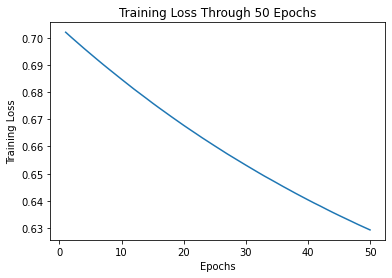

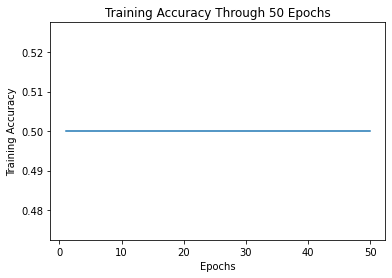

In [ ]:
plt.plot(np.linspace(1, 50, 50).astype(int), loss_list)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss Through 50 Epochs')
plt.show()
plt.plot(np.linspace(1, 50, 50).astype(int), accuracy_list)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Through 50 Epochs')
plt.show()

#### Logistic Regression with SMOTE

For the sake of completeness, we run the Logistic Regression in PyTorch on the SMOTE Oversampled Dataset to see if we find any improvement. 

In [ ]:
for data, label in smote_dataloader:
    input_dim, output_dim = data.numpy().shape, label.numpy().shape
    break
print(input_dim)
print(output_dim)
smote_lr_model = LogisticRegression(input_dim[1], 1)

(32, 36)
(32,)


In [ ]:
from torch.autograd import Variable
def smote_train_model(model, optimizer, criterion, epochs):
    for child in model.children():
      if hasattr(child, 'reset_parameters'):
        child.reset_parameters()
    model.train()
    
    acc_list = []
    l_list = []
    for epoch in range(epochs):
      tot_loss = 0
      total_train = 0
      correct_pred = 0
      for data, labels in tqdm(smote_dataloader):
        outputs = model(data)
        labels = labels.unsqueeze(1)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tot_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        predicted = predicted.unsqueeze(1)
        total_train += labels.nelement()
        print(" Correct Samples out of 32 in batch size: " + str(predicted.eq(labels.data).sum().item()))
        correct_pred += predicted.eq(labels.data).sum().item()
        acc = correct_pred/total_train 
      print("Epoch Accuracy: " + str(correct_pred/total_train))
      acc_list.append(correct_pred/total_train)
      print("Epoch Loss: " + str(tot_loss/len(smote_dataloader)))
      l_list.append(tot_loss/len(smote_dataloader))
      

    final_training_accuracy = correct_pred/total_train  
    final_training_loss = tot_loss / len(smote_dataloader) 
    return final_training_loss, final_training_accuracy, l_list, acc_list

In [ ]:
lr_training_loss, lr_training_accuracy, loss_list, accuracy_list = smote_train_model(smote_lr_model, lr_optimizer, criterion, 20)

print("Logistic Regression - the training loss is ", str(lr_training_loss))
print("Logistic Regression - the training accuracy is ", str(lr_training_accuracy))

 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 18
 Correct S

 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 24
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 22
 Correct S

 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct S

 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 21
 Correct S

 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 19
 Correct S

 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Sa

 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 19
 Correct S

 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 12
 Correct S

 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 23
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct S

 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 19
 Correct S

 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct S

 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 8
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Sam

 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 15
 Correct Sa

 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct S

 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 23
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 21
 Correct S

 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct S

 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 16
 Correct S

 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 24
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 23
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 19
 Correct S

 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 23
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct S

 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 13
 Correct S

Interestingly, we find that our loss quickly reaches its lowest, but then increases again, suggesting that our model is not learning at all. 

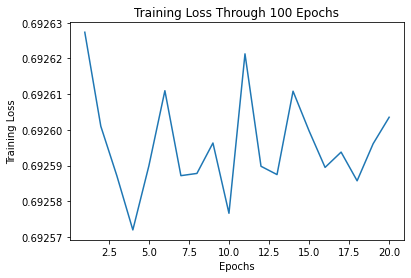

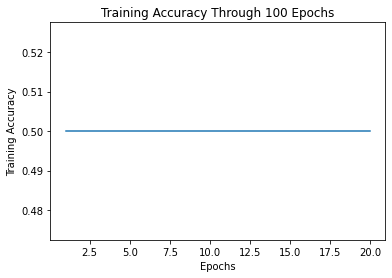

In [ ]:
plt.plot(np.linspace(1, 20, 20).astype(int), loss_list)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss Through 100 Epochs')
plt.show()
plt.plot(np.linspace(1, 20, 20).astype(int), accuracy_list)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Through 100 Epochs')
plt.show()

### Feed-Forward Neural Network in PyTorch

Given the Logistic Regression model in PyTorch was unsuccessful, we try a FeedForward Neural Network, to see how it would perform on this task. 

#### Feed-Forward Neural Network on Random Oversampled Data 

In [ ]:
import torch.nn.functional as F
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = torch.nn.ReLU()
        self.relu2 = torch.nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        hidden = self.fc1(x)
        relu = self.relu1(hidden)
        hidden = self.fc2(relu)
        relu - self.relu2(hidden)
        output = self.fc3(relu)
        return output
for data, label in r_dataloader:
    input_dim, output_dim = data.numpy().shape, label.numpy().shape
    break
print(input_dim)
print(output_dim)
hidden_dim = 128
fnn_model = FeedforwardNeuralNetModel(input_dim[1], hidden_dim, 1)

(32, 36)
(32,)


In [ ]:
fnn_optimizer = torch.optim.SGD(fnn_model.parameters(), lr = 0.0001, momentum=0.9)
fnn_training_loss, fnn_training_accuracy, loss_list, accuracy_list = r_train_model(fnn_model, fnn_optimizer, criterion, 20)

 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct S

 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct S

 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct S

 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 17
 Correct S

 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct S

 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct S

 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct S

 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct S

 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct S

 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct S

 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 25
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 12
 Correct S

 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 17
 Correct S

 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct S

 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct S

 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct S

 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 13
 Correct S

 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 21
 Correct S

 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 25
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 11
 Correct S

 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 23
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 12
 Correct Sa

 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Sa

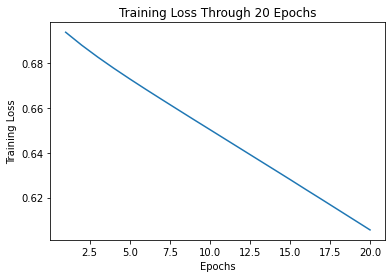

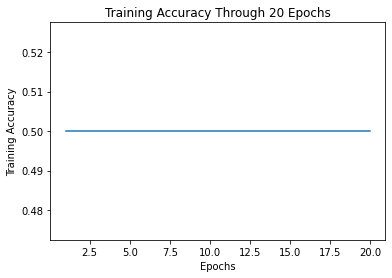

In [ ]:
plt.plot(np.linspace(1, 20, 20).astype(int), loss_list)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss Through ' + str(20) + ' Epochs')
plt.show()
plt.plot(np.linspace(1, 20, 20).astype(int), accuracy_list)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Through ' + str(20) +  ' Epochs')
plt.show()

#### Feed-Forward Neural Network on SMOTE Oversampled Dataset 

In [ ]:
import torch.nn.functional as F
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        self.relu1 = torch.nn.ReLU()
        self.relu2 = torch.nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        hidden = self.fc1(x)
        relu = self.relu1(hidden)
        hidden = self.fc2(relu)
        relu - self.relu2(hidden)
        output = self.fc3(relu)
        return output
for data, label in smote_dataloader:
    input_dim, output_dim = data.numpy().shape, label.numpy().shape
    break
print(input_dim)
print(output_dim)
hidden_dim = 128
fnn_model = FeedforwardNeuralNetModel(input_dim[1], hidden_dim, 1)

(32, 36)
(32,)


In [ ]:
fnn_optimizer = torch.optim.SGD(fnn_model.parameters(), lr = 0.0001, momentum=0.9)
fnn_training_loss, fnn_training_accuracy, loss_list, accuracy_list = smote_train_model(fnn_model, fnn_optimizer, criterion, 20)

 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 21
 Correct S

 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Sa

 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Sa

 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 8
 Correct Samples out of 32 in batch size: 18
 Correct Sam

 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct S

 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 9
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Sa

 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 24
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 19
 Correct S

 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 8
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 17
 Correct Sa

 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 20
 Correct S

 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 16
 Correct S

 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct S

 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct S

 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct S

 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 15
 Correct S

 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct S

 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 14
 Correct S

 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct S

 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 8
 Correct Samples out of 32 in batch size: 22
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Sa

 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 14
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 26
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 13
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 21
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 21
 Correct S

 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 10
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 11
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 12
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 15
 Correct Samples out of 32 in batch size: 19
 Correct Samples out of 32 in batch size: 16
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 17
 Correct Samples out of 32 in batch size: 20
 Correct Samples out of 32 in batch size: 18
 Correct Samples out of 32 in batch size: 20
 Correct S

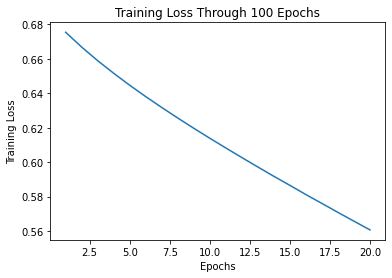

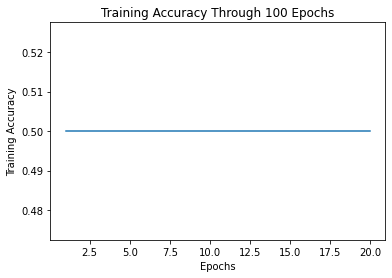

In [ ]:
plt.plot(np.linspace(1, 20, 20).astype(int), loss_list)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss Through 100 Epochs')
plt.show()
plt.plot(np.linspace(1, 20, 20).astype(int), accuracy_list)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy Through 100 Epochs')
plt.show()

We find that the problem is not remedied by using a Feed-Forward Neural Network either. This is likely an issue with the dataset size and features and could be remedied by using a dataset with more samples or more descriptive features.

## Challenges Faced

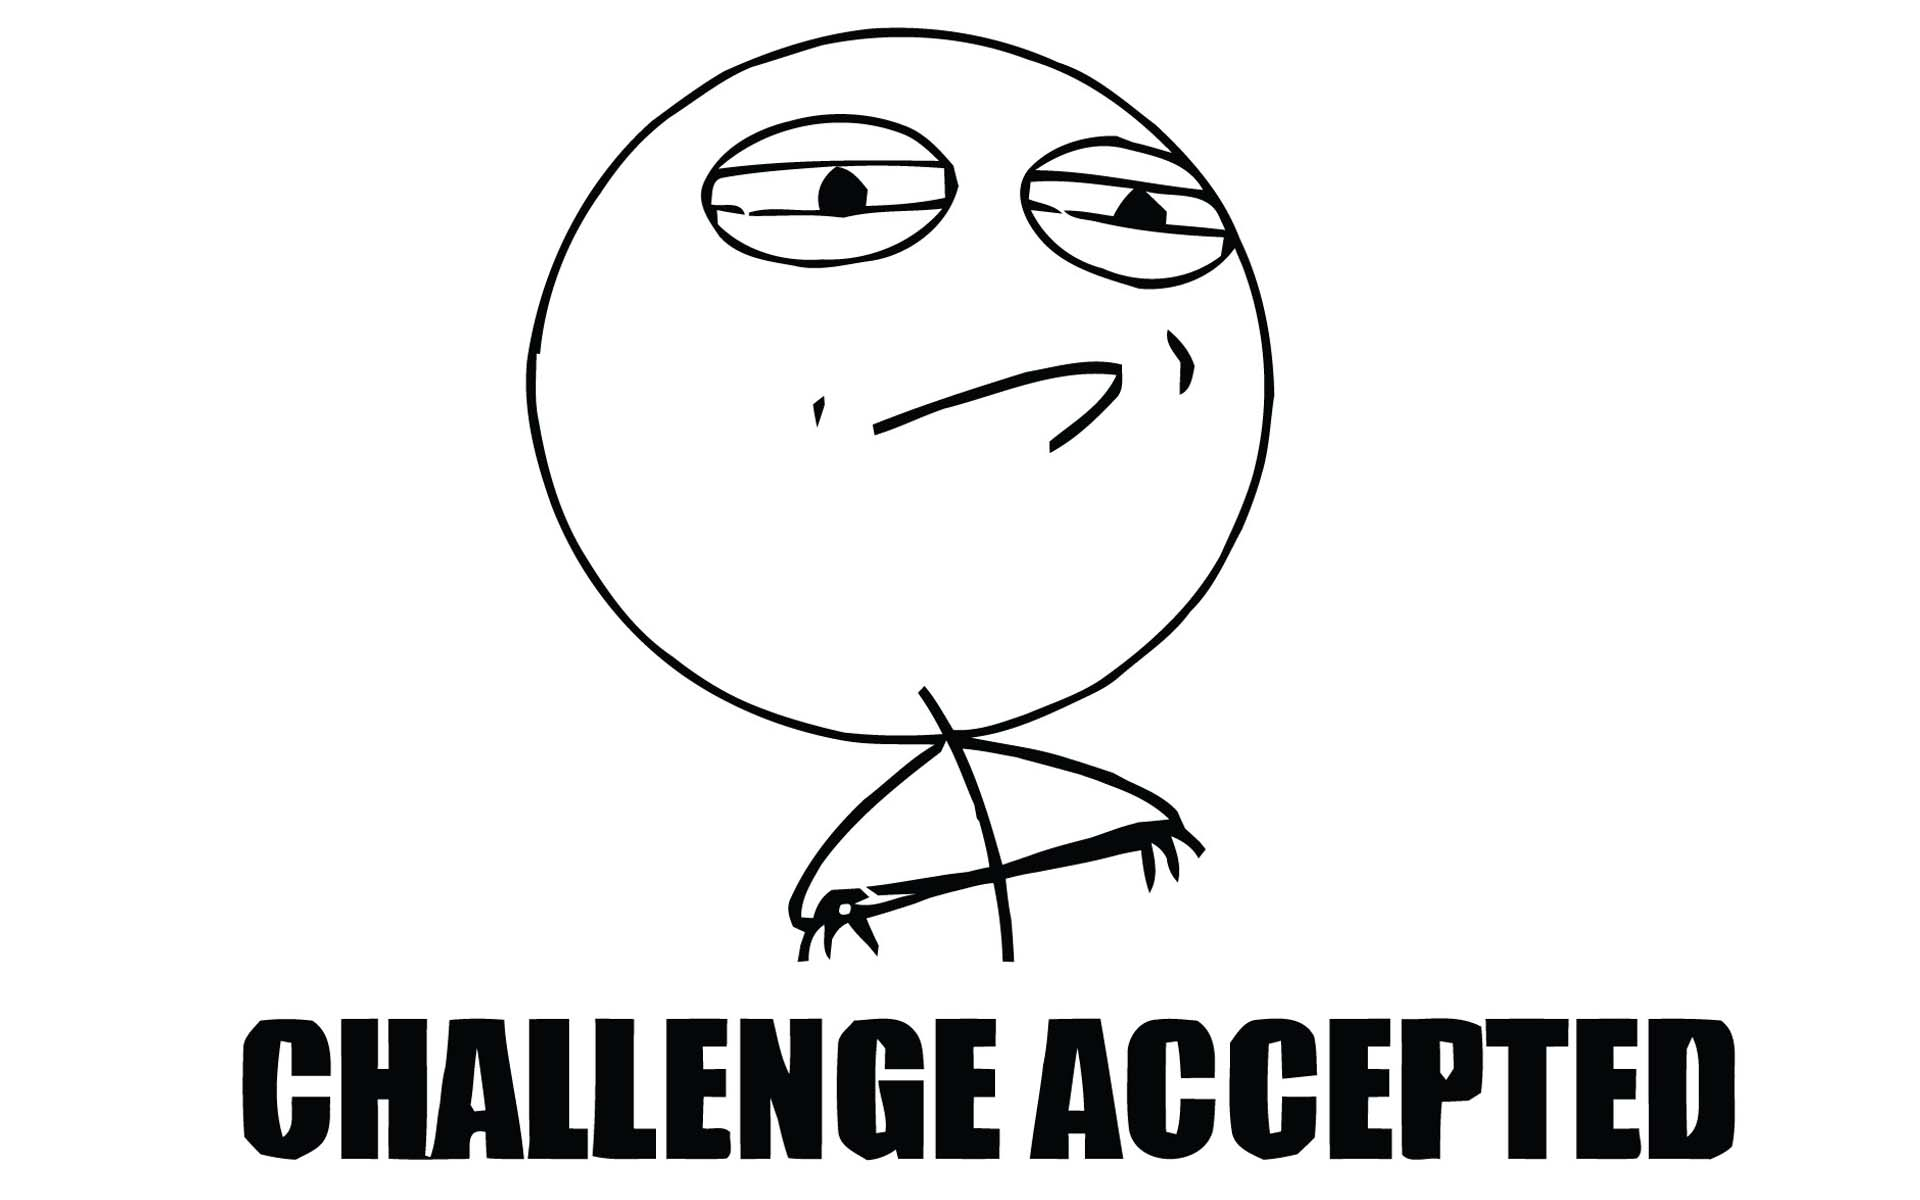


1. One of the significant challenges faced was in the potential multicollinearity of the training data - we needed to identify features that could be collinear and thus, redundant in our training. As such, we used Elastic-Net as the penalty as opposed to L1 and L2 Regularization alone to be able to allow for this as well as if there were features that were found to be useless. We ran Principal Component Analysis (PCA) in order to remedy this issue, in performing dimensionality reduction in the process. 

2. Another challenge was imbalance in the dataset - as mentioned before, 98% of the default feature was "No", indicating individuals who did not default on their loans (generally the desirable outcome from a managerial perspective). There was also some degree of imbalance in education and marital status that was not taken into account and not oversampled on as we did not find a managerial need to predict either of these features as part of a multi-class classification task (this would not yield particularly valuable insights). However, by oversampling on the highly imbalanced 'default' feature we were able to generate a highly accurate model to predict whether an individual would have credit on default. This is especially something important to know from a managerial perspective, as those who would have credit on default would be worse at managing their money, and should be kept an eye on in the future. 

3. We also had a reasonably large portion of the data including missing or useless data, with "unknown" or a missing value being especially present in features such as pdays and poutcome, which influenced our decision to drop these features altogether from the prediction. We could not impute a value, as these were categorical and it did not make sense to impute for such a large portion of a feature (approximately 75% of pdays and poutcomes). 

4. We found that when training the neural networks, we had a stagnant accuracy of 50% although the loss was consistently decreasing in a linear fashion. This appears to be likely due to the dataset as this was validated by using a less complicated model architecture and observing the same results in both TensorFlow and PyTorch. As mentioned previously, this could be remedied by using a more descriptive dataset.

5. We wanted to use regression to predict the balance of accounts in the dataset, but we were unable to achieve a reasonable RMSE score. We tried using various types of regularization, but the model still had a very high RMSE value. We assume that this is due to the dataset for reasons that are detailed above in the section titled "A Poorly Fitting Regression Model."

## Next Steps and Conclusions

### Conclusion
The key takeway is that oftentimes, simpler models can work quite well on datasets such as this, and that black-box methods such as deep learning are not always necessary to generate insightful conclusions (as per Occam's Razor). It is particularly worth noting that while there was not a significant difference in performance between the ensemble and non-emsemble methods (Random Forest and XGBoost in ensemble and Logistic Regession in non-ensemble) for the "Deposit" classification task, we found that the ensemble methods performed significantly better using oversampled data for the "Default" classification task. However, there are important steps that need to be taken in data processing to ensure that we are working with relevant data and in the correct format, such as running dimensionality reduction through PCA while detecting any multicollinearity through the number of components kept, and the oversampling work to ensure that the model is not "biased" towards one class due to imbalance.


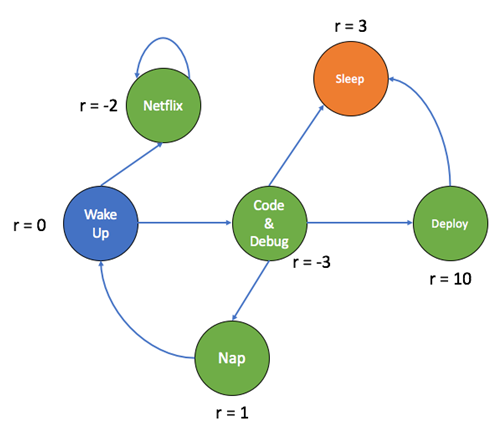


### Next Steps
While this dataset alone is limited in next steps, the UCI database has a full dataset of over 41,000 rows, of which the dataset examined above is a filtered version. We can perhaps explore this dataset as well, and determine if a greater volume of data, especially if valid, would improve the performance of our models, especially on the "Deposit" classification and the PyTorch classification of "Default". 

These steps would also further improve our regression model's performance. These additional rows would provide us with potentially better distributed balance samples.

In particular, the poutcome and pdays features could be interesting to analyze, as we could possibly examine probabilistic relationships, and explore some probabilistic machine learning techniques such as Bayesian methods and Hidden Markov Models or Markov Decision Processes. The latter could be especially interesting with regards to the duration individuals spent on the call as part of this telemarketing experiment and its relationship to whether an individual deposited as a result. This could be especially cool in leading to the exploration of Reinforcement Learning in this dataset, but this would likely depend on having more features available or some of the missing data being filled. 